In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import re, pickle
import functools
import itertools
import string

from string import digits

## Load Data

In [2]:
with open('logit_us.pkl', 'rb') as file:
    clf = pickle.load(file)

In [55]:
with open('../dataset/eng_result.pkl', 'rb') as f:
    eng_result = pickle.load(f)

with open('../dataset/chn_result.pkl', 'rb') as f:
    chn_result = pickle.load(f)

with open('../dataset/port_result.pkl', 'rb') as f:
    port_result = pickle.load(f)

with open('../dataset/spanish_result.pkl', 'rb') as f:
    spanish_result = pickle.load(f)

with open('../dataset/french_result.pkl', 'rb') as f:
    french_result = pickle.load(f)

with open('../dataset/german_result.pkl', 'rb') as f:
    german_result = pickle.load(f)

with open('../dataset/greek_result.pkl', 'rb') as f:
    greek_result = pickle.load(f)

with open('../dataset/hung_result.pkl', 'rb') as f:
    hung_result = pickle.load(f)

with open('../dataset/hindi_result.pkl', 'rb') as f:
    hindi_result = pickle.load(f)

with open('../dataset/irish_result.pkl', 'rb') as f:
    irish_result = pickle.load(f)

with open('../dataset/italian_result.pkl', 'rb') as f:
    italian_result = pickle.load(f)

with open('../dataset/jap_result.pkl', 'rb') as f:
    jap_result = pickle.load(f)

with open('../dataset/arab_result.pkl', 'rb') as f:
    arab_result = pickle.load(f)

with open('../dataset/thai_result.pkl', 'rb') as f:
    thai_result = pickle.load(f)

with open('../dataset/fili_result.pkl', 'rb') as f:
    fili_result = pickle.load(f)

with open('../dataset/viet_result.pkl', 'rb') as f:
    viet_result = pickle.load(f)

with open('../dataset/kor_result.pkl', 'rb') as f:
    kor_result = pickle.load(f)

with open('../dataset/russian_result.pkl', 'rb') as f:
    russian_result = pickle.load(f)

In [92]:
def draw_pie_chart(df, language):
    cuisine_counts = df['cuisine'].value_counts()
    plt.figure(figsize=(10, 7))  
    colors = plt.cm.tab20c.colors 
    wedges, texts, autotexts = plt.pie(cuisine_counts, 
                                       colors=colors[:len(cuisine_counts)],
                                       autopct=lambda pct: "{:.1f}%".format(pct) if pct > 2 else '',  # Only label inside if % > 2
                                       startangle=140,
                                       pctdistance=0.85)
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.axis('equal')  
    plt.title(f'{language} Responses: Proportion of Different Cuisines')
    plt.legend(wedges, cuisine_counts.index, title="Cuisines", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))
    
    for text, autotext in zip(texts, autotexts):
        if autotext.get_text(): 
            if float(autotext.get_text().replace('%', '')) <= 2:  
                x, y = autotext.get_position()
                autotext.set_text('') 
                plt.annotate(f"{float(autotext.get_text()):.1f}%", xy=(x, y), 
                             xytext=(1.4*x, 1.4*y),
                             textcoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
    plt.show()

## Preprocess Data

In [37]:
def clean_string(s, aslist=False):
    '''Helper function to clean ingredients'''
    remove_digits = str.maketrans('', '', digits)
    remove_punctuation = str.maketrans('', '', string.punctuation)
    remove_whitespace = str.maketrans('', '', string.whitespace)

    german_ingr = {'zitrone':'lemon', 'zitronen saft':'lemon juice','zwiebel':'onions', 'öl':'oil'}

    # Remove all digits and parenthesis content from ingredients
    tmp = s.translate(remove_punctuation).lower().translate(remove_digits)
    tmp = re.sub(r'\(*\)','',tmp)

    # Remove some stop words
    alist =['low fat', 'reduced fat', 'fat free', 'fatfree', 'nonfat','gluten free', 'free range',
         'reduced sodium', 'salt free','sodium free', 'low sodium', 'sweetened','unsweetened','large','extra large','oz','®','™','oldelpaso','alfredo','knorr'
        ,'hellmannâ','orbestfoodcanolacholesterolfree','€']
    for stra in alist:
        tmp = tmp.replace(stra,'')


    # Normalize ingredient names
    alist = ['chile', 'chili','chilies','chilli','sriracha']

    for pepper in alist:
         if pepper in tmp:
            tmp = 'chili'
            break

    blist = [['flour','flour'],['tumeric','turmeric'],['yoghurt','yogurt'],['yogurt','yogurt'],['sausage','sausage'],['fillet','raw fish'],['mozzarella','mozzarella cheese'],
          ['spinach','spinach']]
    for tup in blist:
        if tup[0] in tmp:
            tmp = tup[1]

    # Translate some ingredient names to english
    if(tmp in german_ingr):
        tmp = german_ingr[tmp]

    # Remove spaces between words that defines an ingredients (e.g. “chicken breast” becomes “chickenbreast”)
    # this step is useful for the tfidf vectorization
    if not aslist:
        tmp = tmp.translate(remove_whitespace)

    return tmp

In [6]:
def generate_text_ingredients(df):
    df.ingredients = df.ingredients.apply(lambda x: list(map(lambda y: clean_string(y, aslist=True), x)))
    df['text_ingredients'] = df['ingredients'].apply(lambda l_ingredients : functools.reduce(lambda acc,x : acc +' ' +x,map(lambda ingred: clean_string(ingred),l_ingredients)))
    return df

In [14]:
eng_df = generate_text_ingredients(eng_result)

In [15]:
chn_df = generate_text_ingredients(chn_result)

In [56]:
port_df = generate_text_ingredients(port_result)

In [17]:
spanish_df = generate_text_ingredients(spanish_result)

In [18]:
french_df = generate_text_ingredients(french_result)

In [33]:
german_df = generate_text_ingredients(german_result)

In [20]:
greek_df = generate_text_ingredients(greek_result)

In [21]:
hung_df = generate_text_ingredients(hung_result)

In [22]:
hindi_df = generate_text_ingredients(hindi_result)

In [34]:
irish_df = generate_text_ingredients(irish_result)

In [39]:
italian_df = generate_text_ingredients(italian_result)

In [25]:
jap_df = generate_text_ingredients(jap_result)

In [41]:
arab_df = generate_text_ingredients(arab_result)

In [43]:
thai_df = generate_text_ingredients(thai_result)

In [45]:
fili_df = generate_text_ingredients(fili_result)

In [29]:
viet_df = generate_text_ingredients(viet_result)

In [30]:
kor_df = generate_text_ingredients(kor_result)

In [47]:
russian_df = generate_text_ingredients(russian_result)

In [49]:
with open('tfidf_vectorizer_us.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

## Classification

### English Version Classification

In [51]:
eng_X = vectorizer.transform(eng_df['text_ingredients'])
eng_pred = clf.predict(eng_X)
eng_df['cuisine'] = eng_pred
eng_df

,name,ingredients,text_ingredients,cuisine
0,quinoa salad,"[quinoa, cucumber, cherry tomatoes, red onion,...",quinoa cucumber cherrytomatoes redonion fetach...,greek
1,avocado toast,"[whole grain bread, ripe avocado, lemon juice,...",wholegrainbread ripeavocado lemonjuice salt pe...,southern_us
2,smoothie bowl,"[fren berries, banana, spinach, almond milk, g...",frenberries banana spinach almondmilk granola ...,brazilian
3,chickpea curry,"[chickpeas, coconut milk, onion, tomato, garli...",chickpeas coconutmilk onion tomato garlic curr...,indian
4,stuffed bell peppers,"[bell peppers, quinoa, black beans, corn, toma...",bellpeppers quinoa blackbeans corn tomato ched...,mexican
...,...,...,...,...
295,baked salmon,"[raw fish, lemon, dill, olive oil, salt, pepper]",rawfish lemon dill oliveoil salt pepper,russian
296,chicken avocado salad,"[chicken breast, avocado, corn, cilantro, lime...",chickenbreast avocado corn cilantro limejuice ...,mexican
297,smoothie bowl,"[fren berries, banana, spinach, almond milk, g...",frenberries banana spinach almondmilk granola ...,brazilian
298,gluten-free oat pancakes,"[glutenfree oats, banana, eggs, baking powder,...",glutenfreeoats banana eggs bakingpowder vanill...,italian


### Chinese Version Classification

In [52]:
chn_X = vectorizer.transform(chn_df['text_ingredients'])
chn_pred = clf.predict(chn_X)
chn_df['cuisine'] = chn_pred
chn_df

,name,ingredients,text_ingredients,cuisine
0,green salad,"[spinach, kale, cucumber, cherry tomatoes, avo...",spinach kale cucumber cherrytomatoes avocado l...,greek
1,hummus,"[chickpeas, garlic, tahini, olive oil, lemon j...",chickpeas garlic tahini oliveoil lemonjuice sa...,greek
2,grilled salmon,"[salmon, olive oil, lemon, rosemary, salt, bla...",salmon oliveoil lemon rosemary salt blackbean,italian
3,vegetable soup,"[carrot, onion, garlic, celery, broccoli, toma...",carrot onion garlic celery broccoli tomato wat...,filipino
4,oatmeal breakfast,"[oatmeal, milk, fruit, honey, nuts]",oatmeal milk fruit honey nuts,southern_us
...,...,...,...,...
295,grilled mackerel with lime,"[mackerel, lime, ginger slices, garlic, sour b...",mackerel lime gingerslices garlic sourbeans ch...,brazilian
296,vegetable bean stew,"[bean, potato, carrot, cabbage, tomato, zucchi...",bean potato carrot cabbage tomato zucchini bro...,italian
297,roasted pumpkin salad with apples,"[pumpkin, apple, walnut, cranberry, jackfruit,...",pumpkin apple walnut cranberry jackfruit pinea...,moroccan
298,sugar-free cake,"[almond powder, coconut powder, vanilla extrac...",almondpowder coconutpowder vanillaextract cran...,italian


### Portuguese Version Classification

In [58]:
port_X = vectorizer.transform(port_df['text_ingredients'])
port_pred = clf.predict(port_X)
port_df['cuisine'] = port_pred
port_df

,name,ingredients,text_ingredients,cuisine
0,quinoa salad with vegetables,"[quinoa, cucumber, cherry tomato, pepper, lemo...",quinoa cucumber cherrytomato pepper lemon oliv...,greek
1,green smoothie,"[spinach, banana, mango, almond milk, honey, c...",spinach banana mango almondmilk honey chia,brazilian
2,egg white omelet with spinach,"[egg whites, spinach, tomato, feta cheese, sal...",eggwhites spinach tomato fetacheese salt pepper,greek
3,lentil soup,"[lentils, carrots, onions, garlic, thyme, vege...",lentils carrots onions garlic thyme vegetableb...,jamaican
4,grilled chicken salad,"[chicken breast, romaine lettuce, croutons, pa...",chickenbreast romainelettuce croutons parmesan...,italian
...,...,...,...,...
295,guacamole,"[avocado, tomato, onion, cilantro, jalapeño, l...",avocado tomato onion cilantro jalapeño lemon salt,mexican
296,night oats,"[oats, almond milk, yogurt, honey, banana, cin...",oats almondmilk yogurt honey banana cinnamon,greek
297,açaí bowl,"[açaí pulp, banana, strawberry, granola, honey...",açaípulp banana strawberry granola honey cocon...,brazilian
298,tuna salad,"[tuna in water, light mayonnaise, celery, carr...",tunainwater lightmayonnaise celery carrot redo...,american


### Spanish Version Classification

In [59]:
spanish_X = vectorizer.transform(spanish_df['text_ingredients'])
spanish_pred = clf.predict(spanish_X)
spanish_df['cuisine'] = spanish_pred
spanish_df

,name,ingredients,text_ingredients,cuisine
0,mediterranean salad,"[cherry tomatoes, cucumber, red onion, feta ch...",cherrytomatoes cucumber redonion fetacheese ka...,greek
1,kale and banana smoothie,"[kale, banana, yogurt, honey, almonds, almond ...",kale banana yogurt honey almonds almondmilk,indian
2,quinoa with vegetables,"[quinoa, zucchini, red pepper, onion, garlic, ...",quinoa zucchini redpepper onion garlic vegetab...,italian
3,lentil soup,"[lentils, tomato, carrot, celery, onion, garli...",lentils tomato carrot celery onion garlic cumi...,mexican
4,tofu stir fry,"[tofu, broccoli, carrot, pepper, soy sauce, ga...",tofu broccoli carrot pepper soysauce garlic gi...,chinese
...,...,...,...,...
295,vegetable and hummus wrap,"[whole wheat tortilla, hummus, romaine lettuce...",wholewheattortilla hummus romainelettuce tomat...,greek
296,oatmeal and fruit bowl,"[oatmeal, almond milk, banana, blueberries, al...",oatmeal almondmilk banana blueberries almonds ...,french
297,chickpea and spinach salad,"[chickpeas, spinach, red pepper, onion purple,...",chickpeas spinach redpepper onionpurple lemon ...,moroccan
298,salmon baked with vegetables,"[salmon, asparagus, lemon, pepper, olive oil]",salmon asparagus lemon pepper oliveoil,italian


### French Version Classification

In [60]:
french_X = vectorizer.transform(french_df['text_ingredients'])
french_pred = clf.predict(french_X)
french_df['cuisine'] = french_pred
french_df

,name,ingredients,text_ingredients,cuisine
0,greek salad,"[tomatoes, cucumber, red onion, black olives, ...",tomatoes cucumber redonion blackolives fetache...,greek
1,spinach and banana smoothie,"[spinach, banana, almond milk, chia seeds, honey]",spinach banana almondmilk chiaseeds honey,brazilian
2,vegetable omelette,"[eggs, peppers, onions, spinach, tomatoes, fet...",eggs peppers onions spinach tomatoes fetacheese,greek
3,buddha bowl,"[quinoa, black beans, lawyer, grated carrots, ...",quinoa blackbeans lawyer gratedcarrots redcabb...,mexican
4,lentil soup,"[lentils, carrots, onion, celery, peeled tomat...",lentils carrots onion celery peeledtomatoes ve...,moroccan
...,...,...,...,...
295,greek salad,"[tomatoes, cucumber, olives, red onion, feta, ...",tomatoes cucumber olives redonion feta oliveoi...,greek
296,zucchini with tomato sauce,"[zucchini, crushed tomatoes, garlic, onion, ba...",zucchini crushedtomatoes garlic onion basil ol...,italian
297,chicken curry and spinach,"[chicken, spinach, coconut milk, curry paste, ...",chicken spinach coconutmilk currypaste onion g...,thai
298,spinach pasta,"[carrots, fresh ginger, onion, vegetable broth...",carrots freshginger onion vegetablebroth cream...,irish


### German Version Classification

In [61]:
german_X = vectorizer.transform(german_df['text_ingredients'])
german_pred = clf.predict(german_X)
german_df['cuisine'] = german_pred
german_df

,name,ingredients,text_ingredients,cuisine
0,quinoa salad,"[quinoa, cucumber, cherry tomatoes, feta chees...",quinoa cucumber cherrytomatoes fetacheese oliv...,greek
1,green smoothie,"[spinach, bananas, apple, ginger, water, lemon...",spinach bananas apple ginger water lemonjuice,japanese
2,lentil soup,"[lentils, carrots, onions, celery, garlic, thy...",lentils carrots onions celery garlic thyme sal...,french
3,hummus,"[chickpeas, tahini, garlic, lemon juice, olive...",chickpeas tahini garlic lemonjuice oliveoil pa...,greek
4,vegetable stir fry,"[broccoli, carrots, zucchini, bell pepper, soy...",broccoli carrots zucchini bellpepper soysauce ...,korean
...,...,...,...,...
295,kale salad with avocado and quinoa,"[kale, quinoa, avocado, lemon juice, olive oil...",kale quinoa avocado lemonjuice oliveoil almonds,spanish
296,sweet potato bowl,"[sweet potatoes, quinoa, spinach, avocado, bee...",sweetpotatoes quinoa spinach avocado beetroot ...,greek
297,rice with vegetables,"[wholegrain rice, broccoli, peppers, onions, e...",wholegrainrice broccoli peppers onions eggs so...,chinese
298,morning oatmeal,"[oatmeal, almond milk, blueberries, chia seeds...",oatmeal almondmilk blueberries chiaseeds honey...,brazilian


### Greek Version Classification

In [63]:
greek_X = vectorizer.transform(greek_df['text_ingredients'])
greek_pred = clf.predict(greek_X)
greek_df['cuisine'] = greek_pred
greek_df

,name,ingredients,text_ingredients,cuisine
0,vegetable quinoa salad,"[quinoa, peppers, cucumber, onions, tomatoes, ...",quinoa peppers cucumber onions tomatoes oliveo...,greek
1,avocado and spinach smoothie,"[avocado, spinach, apple, yogurt, honey, water]",avocado spinach apple yogurt honey water,greek
2,omelette with asparagus and feta,"[eggs, asparagus, feta, onion, pepper, salt, o...",eggs asparagus feta onion pepper salt oliveoil,spanish
3,spinach and ricotta tart,"[spinach, ricotta, crust, eggs, nutmeg, salt, ...",spinach ricotta crust eggs nutmeg salt pepper,italian
4,grilled chicken with lemon sauce,"[chicken, lemon, garlic, oregano, salt, pepper...",chicken lemon garlic oregano salt pepper oliveoil,greek
...,...,...,...,...
295,hearty chickpea salad,"[chickpeas, pepper, corn, onion, black olives,...",chickpeas pepper corn onion blackolives oliveoil,moroccan
296,quinoa bowls with asian vegetables,"[quinoa, carrot, red pepper, mushrooms, soya s...",quinoa carrot redpepper mushrooms soyasauce se...,korean
297,spinach and feta omelette,"[eggs, spinach, slice, onion, salt, pepper]",eggs spinach slice onion salt pepper,italian
298,chicken tikka masala,"[chicken, yogurt, tomatoes, masala, curry, onion]",chicken yogurt tomatoes masala curry onion,indian


### Hungarian Version Classification

In [64]:
hung_X = vectorizer.transform(hung_df['text_ingredients'])
hung_pred = clf.predict(hung_X)
hung_df['cuisine'] = hung_pred
hung_df

,name,ingredients,text_ingredients,cuisine
0,quinoa salad,"[quinoa, cucumber, tomato, red onion, feta che...",quinoa cucumber tomato redonion fetacheese lem...,greek
1,green smoothie,"[kale, spinach, banana, apple, chia seed, almo...",kale spinach banana apple chiaseed almondmilk,italian
2,broccoli chicken,"[chicken breast, broccoli, garlic, soy sauce, ...",chickenbreast broccoli garlic soysauce honey s...,chinese
3,avocado egg salad,"[egg, ripe avocado, snidling, lime juice, yogu...",egg ripeavocado snidling limejuice yogurt must...,british
4,beet salad with walnuts,"[beetroot, nuts, feta cheese, dried cranberrie...",beetroot nuts fetacheese driedcranberries oliv...,greek
...,...,...,...,...
295,sweet potato meatloaf,"[sweet potato, black bean, coriander, onion, g...",sweetpotato blackbean coriander onion garlic q...,vietnamese
296,broccoli cream soup,"[broccoli, onion, garlic, celery, apple, cocon...",broccoli onion garlic celery apple coconutmilk,filipino
297,chickpea curry,"[chickpeas, coconut milk, curry powder, onion,...",chickpeas coconutmilk currypowder onion garlic...,indian
298,spinach casserole,"[spinach, egg, feta cheese, sour cream, onion,...",spinach egg fetacheese sourcream onion garlic,greek


### Hindi Version Classification

In [65]:
hindi_X = vectorizer.transform(hindi_df['text_ingredients'])
hindi_pred = clf.predict(hindi_X)
hindi_df['cuisine'] = hindi_pred
hindi_df

,name,ingredients,text_ingredients,cuisine
0,quinoa salad,"[quinoa, cherry tomatoes, cucumber, red onion,...",quinoa cherrytomatoes cucumber redonion oliveo...,greek
1,oats and chia seed pudding,"[oats, chia seeds, milk or milk alternative, h...",oats chiaseeds milkormilkalternative honey van...,southern_us
2,broccoli soup,"[broccoli, onion, garlic, vegetable stock, sal...",broccoli onion garlic vegetablestock salt pepp...,italian
3,turkey and vegetable stir fry,"[turkey breast, red bell pepper, onion, brocco...",turkeybreast redbellpepper onion broccoli soys...,chinese
4,smoothie bowl,"[fren berries, banana, spirulina powder, milk ...",frenberries banana spirulinapowder milkormilka...,brazilian
...,...,...,...,...
295,vegetable stir fry,"[broccoli, carrot, red capsicum, ginger, garli...",broccoli carrot redcapsicum ginger garlic soya...,chinese
296,palak paneer,"[spinach, paneer, onion, tomatoes, gingergarli...",spinach paneer onion tomatoes gingergarlicpast...,indian
297,masoor dal,"[masoor dal, onion, tomatoes, turmeric powder,...",masoordal onion tomatoes turmericpowder cumin ...,mexican
298,tofu tikka,"[tofu, yogurt, tandoori masala, garlic paste, ...",tofu yogurt tandoorimasala garlicpaste gingerp...,indian


### Irish Version Classification

In [66]:
irish_X = vectorizer.transform(irish_df['text_ingredients'])
irish_pred = clf.predict(irish_X)
irish_df['cuisine'] = irish_pred
irish_df

,name,ingredients,text_ingredients,cuisine
0,spinach and strawberry salad,"[spinach, strawberries, walnuts, feta, olive, ...",spinach strawberries walnuts feta olive balsam...,italian
1,mango and spinach smoothie,"[mango, spinach, chia seeds, almond milk, honey]",mango spinach chiaseeds almondmilk honey,brazilian
2,guacamole recipe,"[avocado, tomatoes, oven, lime juice, cayenne ...",avocado tomatoes oven limejuice cayennepepper ...,mexican
3,fish tacos,"[fish, cabbage, yogurt, lime juice, corn torti...",fish cabbage yogurt limejuice corntortillas,mexican
4,vegetable soup,"[black curry, carrots, red peppers, broccoli, ...",blackcurry carrots redpeppers broccoli water h...,vietnamese
...,...,...,...,...
295,turkey wraps,"[cooked turkey, cabbage leaves, avocado, tomat...",cookedturkey cabbageleaves avocado tomatoes re...,american
296,fried no pain dish,"[brown rice, black beans, red peppers, zucchin...",brownrice blackbeans redpeppers zucchiniseeds ...,cuban
297,grilled tofu salad,"[tofu, mixed greens, red peppers, yellow peppe...",tofu mixedgreens redpeppers yellowpeppers onio...,mexican
298,carrot pata and carrot,"[carrot, parsley, walnuts, olive oil, cumin, s...",carrot parsley walnuts oliveoil cumin salt pepper,moroccan


### Italian Version Classification

In [67]:
italian_X = vectorizer.transform(italian_df['text_ingredients'])
italian_pred = clf.predict(italian_X)
italian_df['cuisine'] = italian_pred
italian_df

,name,ingredients,text_ingredients,cuisine
0,quinoa and vegetable salad,"[quinoa, cherry tomatoes, pepino, peppers, lem...",quinoa cherrytomatoes pepino peppers lemon oli...,greek
1,green smoothie,"[spinach, banana, almond milk, chia seeds, honey]",spinach banana almondmilk chiaseeds honey,brazilian
2,buddha bowl,"[brown rice, chickpeas, carrots, red cabbage, ...",brownrice chickpeas carrots redcabbage avocado...,korean
3,lentil soup,"[lentils, carrots, onion, garlic, vegetable br...",lentils carrots onion garlic vegetablebroth tu...,vietnamese
4,chickpea salad,"[chickpeas, cherry tomatoes, arugula, red onio...",chickpeas cherrytomatoes arugula redonion oliv...,moroccan
...,...,...,...,...
295,courgette spaghetti with pesto,"[courgettes, basil, pine nuts, garlic, olive o...",courgettes basil pinenuts garlic oliveoil parm...,italian
296,spelt risotto with mushrooms,"[spelt, mushrooms, vegetable broth, onion, par...",spelt mushrooms vegetablebroth onion parmigian...,italian
297,beetroot and goat cheese salad,"[beets, goats cheese, walnuts, radishes, salad...",beets goatscheese walnuts radishes salad balsa...,russian
298,chickpea meatballs,"[chickpeas, garlic, parsley, coriander, cumin,...",chickpeas garlic parsley coriander cumin bread...,moroccan


### Japanese Version Classification

In [68]:
jap_X = vectorizer.transform(jap_df['text_ingredients'])
jap_pred = clf.predict(jap_X)
jap_df['cuisine'] = jap_pred
jap_df

,name,ingredients,text_ingredients,cuisine
0,avocado toast,"[avocado, lemon juice, whole wheat bread, salt...",avocado lemonjuice wholewheatbread salt pepper...,american
1,quinoa salad,"[quinoa, cucumber, tomato, red onion, parsley,...",quinoa cucumber tomato redonion parsley lemons...,spanish
2,smoothie bowl,"[fren berries, banana, almond milk, spirulina ...",frenberries banana almondmilk spirulinapowder ...,brazilian
3,vegetarian chili,"[onion, garlic, red pepper, chickpeas, canned ...",onion garlic redpepper chickpeas cannedtomatoe...,mexican
4,roasted salmon and vegetables,"[raw fish, broccoli, carrot, olive oil, lemon,...",rawfish broccoli carrot oliveoil lemon salt pe...,moroccan
...,...,...,...,...
295,avocado and egg salad,"[avocado, boiled egg, lettuce, tomato, cucumbe...",avocado boiledegg lettuce tomato cucumber oliv...,greek
296,sweet potato and cumin soup,"[sweet potato, cumin, onion, garlic, chicken s...",sweetpotato cumin onion garlic chickenstock sa...,cuban
297,pumpkin risotto,"[pumpkin, rice, onion, garlic, chicken stock, ...",pumpkin rice onion garlic chickenstock parmesa...,brazilian
298,oatmeal and banana pancakes,"[oatmeal, banana, egg, baking powder, cinnamon...",oatmeal banana egg bakingpowder cinnamon milk,irish


### Arabic Version Classification

In [70]:
arab_X = vectorizer.transform(arab_df['text_ingredients'])
arab_pred = clf.predict(arab_X)
arab_df['cuisine'] = arab_pred
arab_df

,name,ingredients,text_ingredients,cuisine
0,quinoa and vegetable salad,"[quinoa, sweet pepper, cucumber, carrot, olive...",quinoa sweetpepper cucumber carrot oliveoil le...,spanish
1,herb roasted chicken,"[chicken, garlic, rosemary, thyme, lemon, oliv...",chicken garlic rosemary thyme lemon oliveoil s...,greek
2,lentil soup,"[lentils, tomatoes, carrots, onions, celery, g...",lentils tomatoes carrots onions celery garlic ...,moroccan
3,quinoa tabbouleh,"[quinoa, parsley, mint, tomato, cucumber, gree...",quinoa parsley mint tomato cucumber greenonion...,spanish
4,grilled salmon,"[salmon, garlic, lemon, olive oil, rosemary, s...",salmon garlic lemon oliveoil rosemary salt pepper,greek
...,...,...,...,...
295,chickpea and avocado salad,"[hummus, avocado, cherry tomatoes, red onion, ...",hummus avocado cherrytomatoes redonion balsami...,greek
296,raspberry chia pudding,"[chia seeds, almond milk, honey, fresh berries...",chiaseeds almondmilk honey freshberries vanilla,brazilian
297,energy balls with dates and nuts,"[dates, almonds, grated coconut, raw cocoa, va...",dates almonds gratedcoconut rawcocoa vanilla,british
298,military squash spaghetti,"[spaghetti pasta, military percussion, garlic,...",spaghettipasta militarypercussion garlic parsl...,spanish


### Thai Version Classification

In [71]:
thai_X = vectorizer.transform(thai_df['text_ingredients'])
thai_pred = clf.predict(thai_X)
thai_df['cuisine'] = thai_pred
thai_df

,name,ingredients,text_ingredients,cuisine
0,vegetable salad,"[various salad vegetables, tomatoes, carrots, ...",varioussaladvegetables tomatoes carrots redoni...,greek
1,berry smoothie,"[strawberry, blueberry, raspberry, banana, soy...",strawberry blueberry raspberry banana soymilk ...,southern_us
2,yogurt parfait,"[yogurt, honey, granola, strawberry, blueberry]",yogurt honey granola strawberry blueberry,greek
3,avocado tuna,"[avocado, canned tuna, diced tomatoes, lime, c...",avocado cannedtuna dicedtomatoes lime chili ci...,mexican
4,oatmeal with fruit,"[oats, milk, diced apple, grapes, honey, a pin...",oats milk dicedapple grapes honey apinchofsalt,southern_us
...,...,...,...,...
295,stir-fried kale with garlic,"[kale, garlic, olive oil, salt, pepper]",kale garlic oliveoil salt pepper,italian
296,tom kha gai,"[chicken, galangal, fish balls, tomato, lemong...",chicken galangal fishballs tomato lemongrass,thai
297,stir-fried tofu with curry paste,"[tofu with curry paste, green curry paste, lim...",tofuwithcurrypaste greencurrypaste limeleaves ...,thai
298,oatmeal apple pancake,"[ground oatmeal, apple, eggs, milk, cinnamon p...",groundoatmeal apple eggs milk cinnamonpowder,british


### Filipino Version Classification

In [72]:
fili_X = vectorizer.transform(fili_df['text_ingredients'])
fili_pred = clf.predict(fili_X)
fili_df['cuisine'] = fili_pred
fili_df

,name,ingredients,text_ingredients,cuisine
0,quinoa salad,"[quinoa, cherry tomatoes, cucumber, red onion,...",quinoa cherrytomatoes cucumber redonion fetach...,greek
1,chickpea curry,"[chickpeas, onion, garlic, ginger, tomato pure...",chickpeas onion garlic ginger tomatopuree coco...,indian
2,broccoli soup,"[broccoli, onion, garlic, chicken or vegetable...",broccoli onion garlic chickenorvegetablebroth ...,italian
3,grilled salmon,"[raw fish, lemon juice, olive oil, garlic, dil...",rawfish lemonjuice oliveoil garlic dill salt p...,greek
4,vegetable stir fry,"[broccoli, carrot, bell pepper, snap peas, gin...",broccoli carrot bellpepper snappeas ginger gar...,chinese
...,...,...,...,...
295,kale smoothie,"[kale, banana, apple, chia seeds, almond milk,...",kale banana apple chiaseeds almondmilk honey,brazilian
296,lentil soup,"[lentils, carrot, celery, onion, garlic, tomat...",lentils carrot celery onion garlic tomatoes th...,french
297,cauliflower tacos,"[cauliflower, chili, cumin, garlic powder, lim...",cauliflower chili cumin garlicpowder lime corn...,mexican
298,oatmeal with berries,"[oats, milk, honey, blueberries, strawberries,...",oats milk honey blueberries strawberries almonds,british


### Vietnamnese Version Classification

In [73]:
viet_X = vectorizer.transform(viet_df['text_ingredients'])
viet_pred = clf.predict(viet_X)
viet_df['cuisine'] = viet_pred
viet_df

,name,ingredients,text_ingredients,cuisine
0,boiled chicken with vegetables,"[chicken breast, carrots, potatoes, broccoli, ...",chickenbreast carrots potatoes broccoli onion ...,irish
1,tuna salad,"[canned tuna, lettuce, cherry tomatoes, cucumb...",cannedtuna lettuce cherrytomatoes cucumber red...,greek
2,grilled broccoli,"[broccoli, olive oil, minced garlic, salt, bla...",broccoli oliveoil mincedgarlic salt blackpepper,italian
3,vegetable sandwich,"[whole grain bread, avocado, bell pepper, lett...",wholegrainbread avocado bellpepper lettuce tom...,american
4,oatmeal,"[oats, water, honey, fresh berries]",oats water honey freshberries,american
...,...,...,...,...
295,fruit smoothie,"[banana, strawberries, raspberries, yogurt, ho...",banana strawberries raspberries yogurt honey,british
296,steamed fish with ginger,"[raw fish, ginger, scallion, soy sauce, sesame...",rawfish ginger scallion soysauce sesameoil,chinese
297,boiled chicken with cabbage,"[chicken breast, cabbage, onion, pepper, salt]",chickenbreast cabbage onion pepper salt,irish
298,oatmeal,"[oats, milk, honey, berries, chia seeds]",oats milk honey berries chiaseeds,southern_us


### Korean Version Classification

In [74]:
kor_X = vectorizer.transform(kor_df['text_ingredients'])
kor_pred = clf.predict(kor_X)
kor_df['cuisine'] = kor_pred
kor_df

,name,ingredients,text_ingredients,cuisine
0,quinoa salad,"[quinoa, tomato, cucumber, lemon juice, olive ...",quinoa tomato cucumber lemonjuice oliveoil pep...,greek
1,broccoli soup,"[broccoli, onion, garlic, chicken stock, olive...",broccoli onion garlic chickenstock oliveoil sa...,italian
2,grilled chicken breast,"[chicken breast, paprika, garlic powder, olive...",chickenbreast paprika garlicpowder oliveoil le...,spanish
3,oats and nuts yogurt,"[yogurt, raw oats, honey, almonds, walnuts, bl...",yogurt rawoats honey almonds walnuts blueberries,greek
4,spirulina smoothie,"[spirulina powder, banana, spinach, almond mil...",spirulinapowder banana spinach almondmilk chia...,brazilian
...,...,...,...,...
295,butternut pumpkin soup,"[butternut pumpkin, onion, garlic, vegetable s...",butternutpumpkin onion garlic vegetablestock c...,filipino
296,tomato couscous,"[couscous, cherry tomato, cucumber, lemon juic...",couscous cherrytomato cucumber lemonjuice oliv...,moroccan
297,lentil salad,"[lentils, cucumber, tomato peas, onion, lemon ...",lentils cucumber tomatopeas onion lemonjuice f...,greek
298,simple greek salad,"[tomato, cucumber, red onion, olive, feta chee...",tomato cucumber redonion olive fetacheese oliv...,greek


### Russian Version Classification

In [75]:
russian_X = vectorizer.transform(russian_df['text_ingredients'])
russian_pred = clf.predict(russian_X)
russian_df['cuisine'] = russian_pred
russian_df

,name,ingredients,text_ingredients,cuisine
0,vegetable salad with quinoa,"[quinoa, cucumbers, cherry tomatoes, avocado, ...",quinoa cucumbers cherrytomatoes avocado lemonj...,spanish
1,oatmeal with berries,"[oatmeal, milk or water, honey, mixed berries,...",oatmeal milkorwater honey mixedberries cinnamon,moroccan
2,green smoothie,"[spinach, banana, yogurt, honey, milk, ice]",spinach banana yogurt honey milk ice,greek
3,stewed broccoli with garlic,"[broccoli, garlic, olive oil, salt, pepper]",broccoli garlic oliveoil salt pepper,italian
4,herb grilled salmon,"[salmon, lemon juice, olive oil, dill, garlic,...",salmon lemonjuice oliveoil dill garlic salt pe...,greek
...,...,...,...,...
295,baked salmon with asparagus,"[salmon, asparagus, lemon, garlic, olive oil, ...",salmon asparagus lemon garlic oliveoil salt bl...,italian
296,quinoa salad with vegetables,"[quinoa, cucumber, cherry tomatoes, red onion,...",quinoa cucumber cherrytomatoes redonion avocad...,greek
297,greek yogurt with honey and nuts,"[yogurt, honey, walnuts, cinnamon]",yogurt honey walnuts cinnamon,greek
298,vegetable smoothie,"[spinach, kale, cucumber, apple, banana, water...",spinach kale cucumber apple banana water ice,japanese


## Visualization

In [116]:
all_df = pd.concat([eng_df, chn_df, port_df, spanish_df, french_df, german_df, greek_df, hung_df, hindi_df, irish_df, italian_df, jap_df, arab_df, thai_df, fili_df, viet_df, kor_df, russian_df], axis=0)
all_df

,name,ingredients,text_ingredients,cuisine
0,quinoa salad,"[quinoa, cucumber, cherry tomatoes, red onion,...",quinoa cucumber cherrytomatoes redonion fetach...,greek
1,avocado toast,"[whole grain bread, ripe avocado, lemon juice,...",wholegrainbread ripeavocado lemonjuice salt pe...,southern_us
2,smoothie bowl,"[fren berries, banana, spinach, almond milk, g...",frenberries banana spinach almondmilk granola ...,brazilian
3,chickpea curry,"[chickpeas, coconut milk, onion, tomato, garli...",chickpeas coconutmilk onion tomato garlic curr...,indian
4,stuffed bell peppers,"[bell peppers, quinoa, black beans, corn, toma...",bellpeppers quinoa blackbeans corn tomato ched...,mexican
...,...,...,...,...
295,baked salmon with asparagus,"[salmon, asparagus, lemon, garlic, olive oil, ...",salmon asparagus lemon garlic oliveoil salt bl...,italian
296,quinoa salad with vegetables,"[quinoa, cucumber, cherry tomatoes, red onion,...",quinoa cucumber cherrytomatoes redonion avocad...,greek
297,greek yogurt with honey and nuts,"[yogurt, honey, walnuts, cinnamon]",yogurt honey walnuts cinnamon,greek
298,vegetable smoothie,"[spinach, kale, cucumber, apple, banana, water...",spinach kale cucumber apple banana water ice,japanese


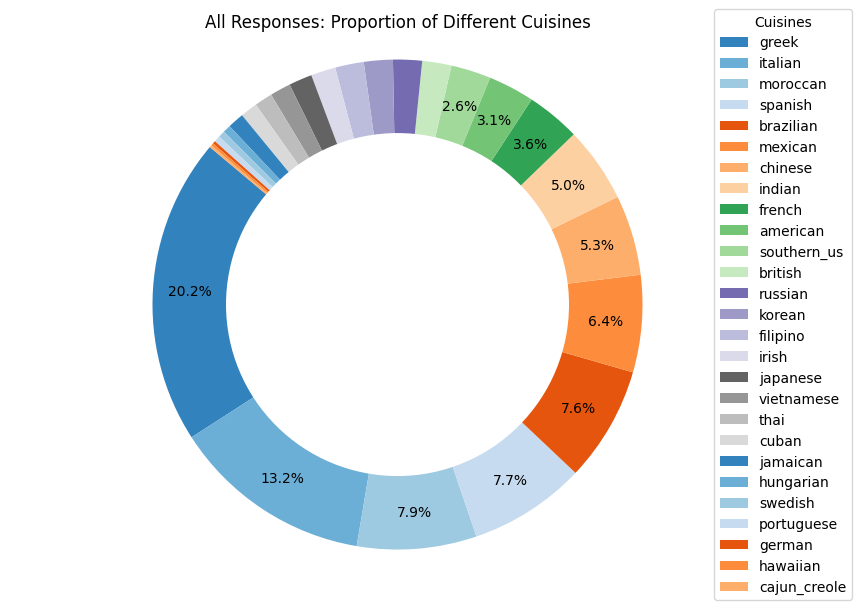

In [117]:
draw_pie_chart(all_df, 'All')

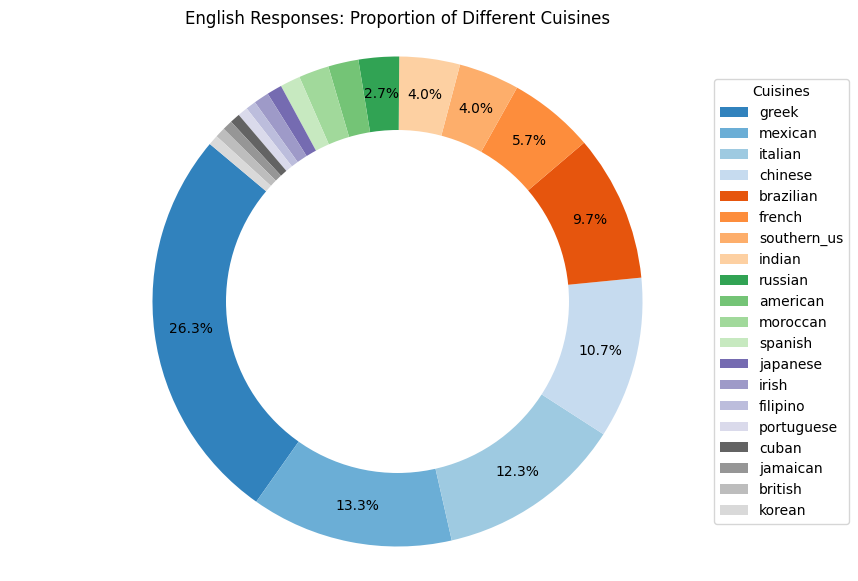

In [95]:
draw_pie_chart(eng_df, 'English')

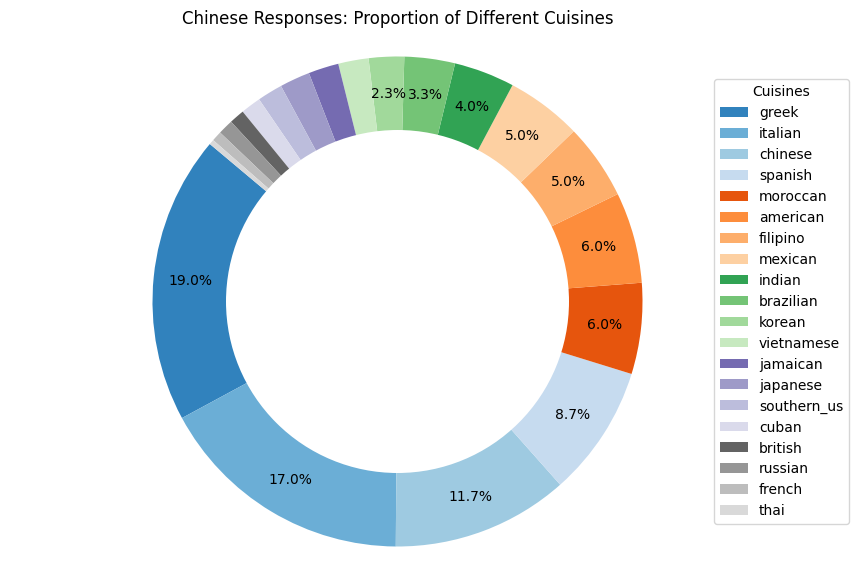

In [96]:
draw_pie_chart(chn_df, 'Chinese')

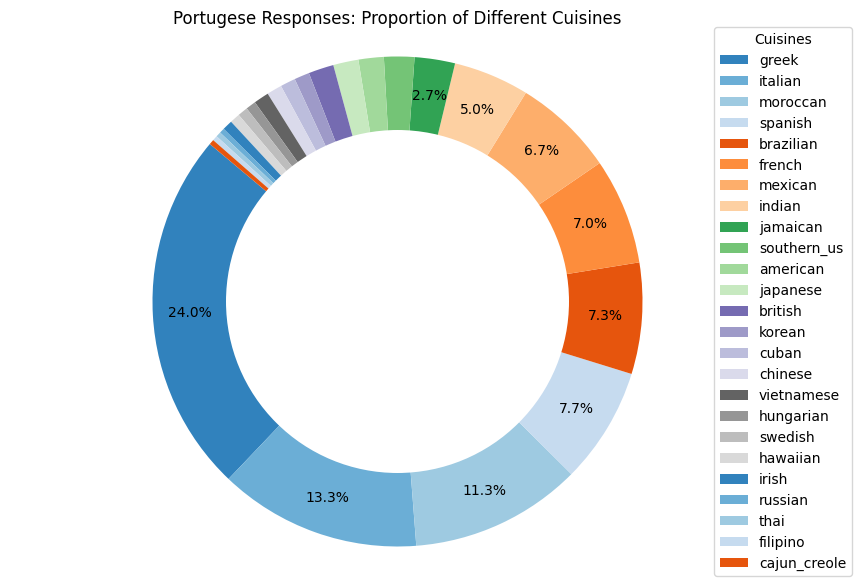

In [97]:
draw_pie_chart(port_df, 'Portugese')

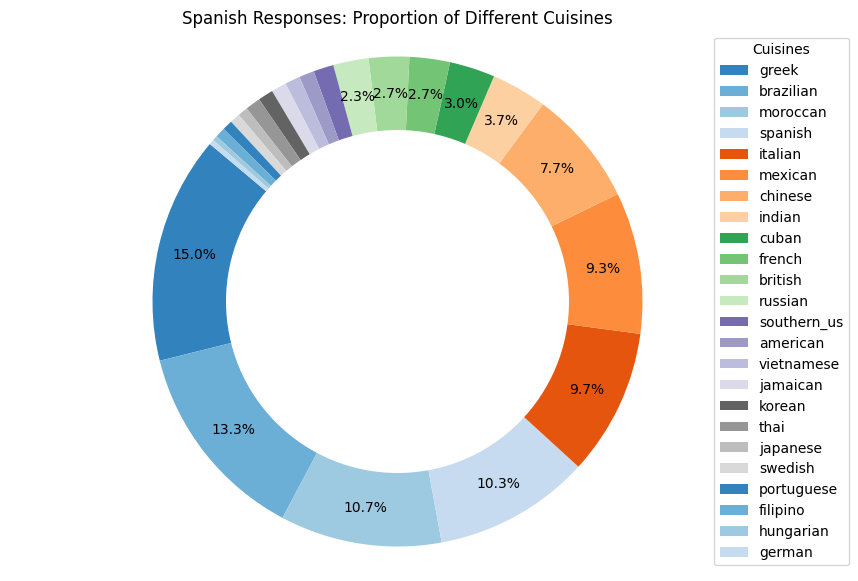

In [99]:
draw_pie_chart(spanish_df, 'Spanish')

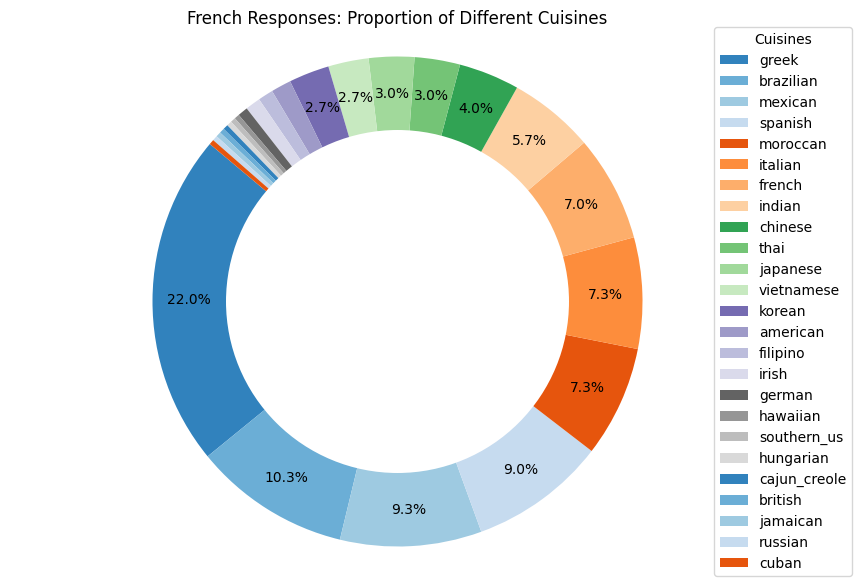

In [100]:
draw_pie_chart(french_df, 'French')

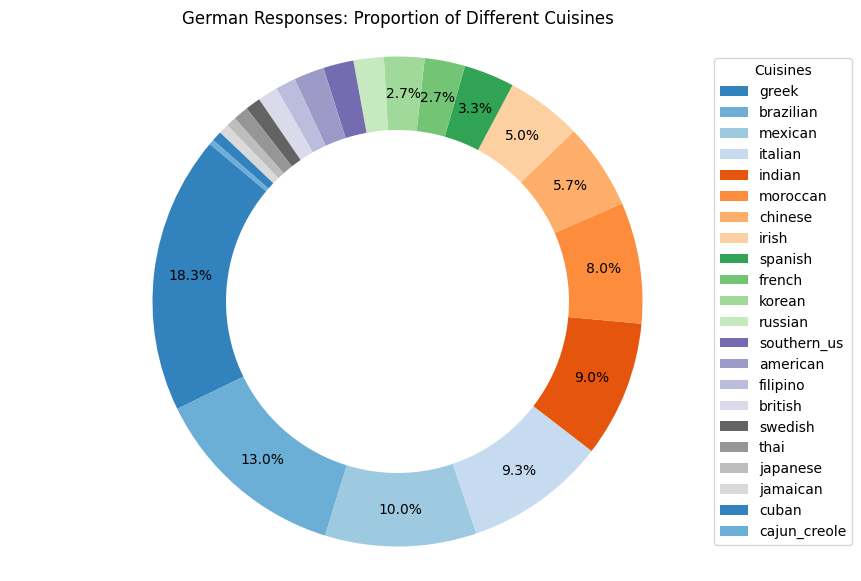

In [101]:
draw_pie_chart(german_df, 'German')

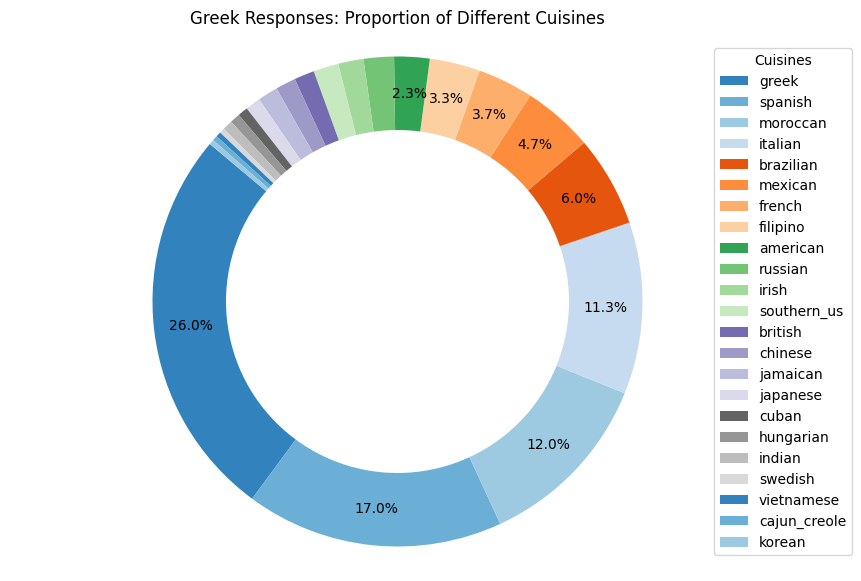

In [102]:
draw_pie_chart(greek_df, 'Greek')

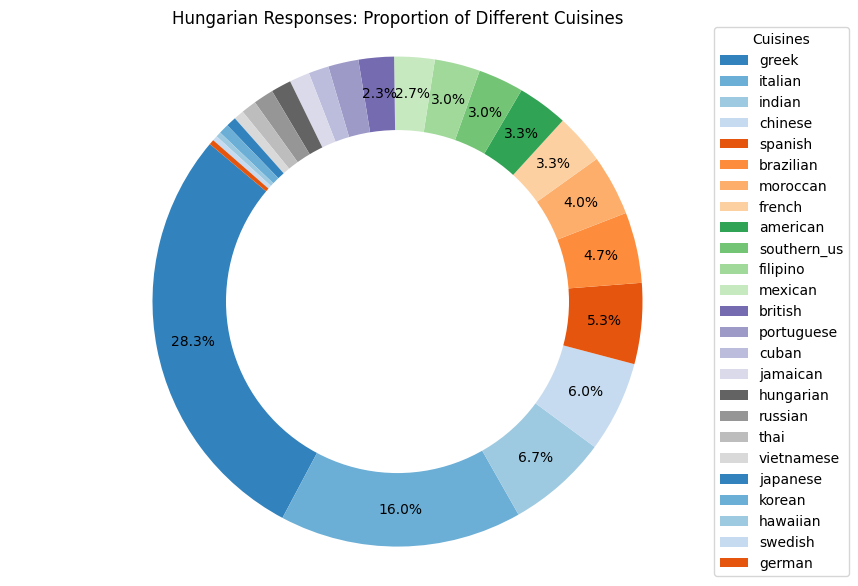

In [103]:
draw_pie_chart(hung_df, 'Hungarian')

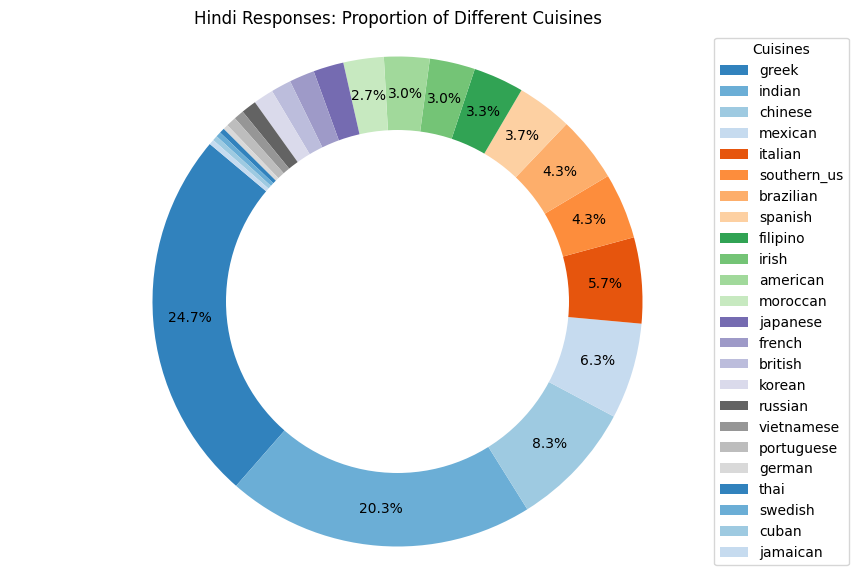

In [104]:
draw_pie_chart(hindi_df, 'Hindi')

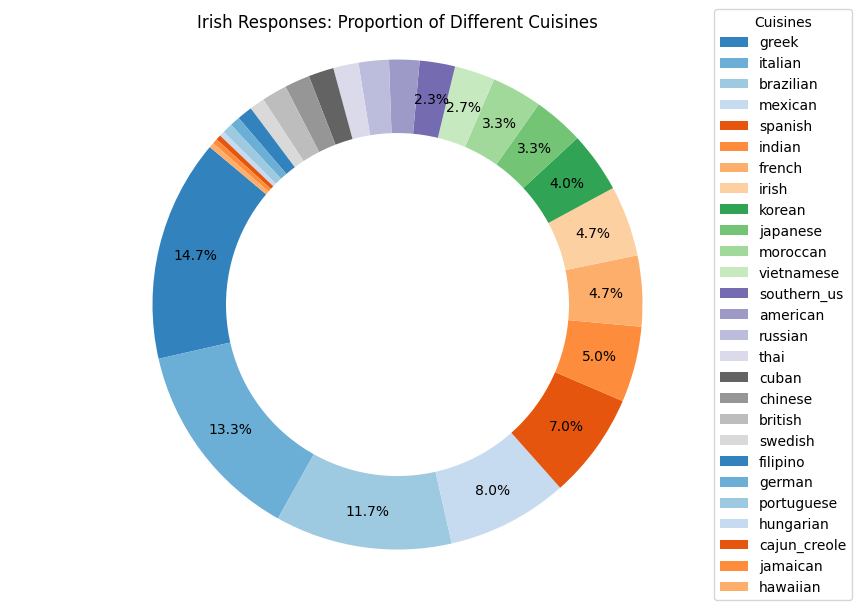

In [105]:
draw_pie_chart(irish_df, 'Irish')

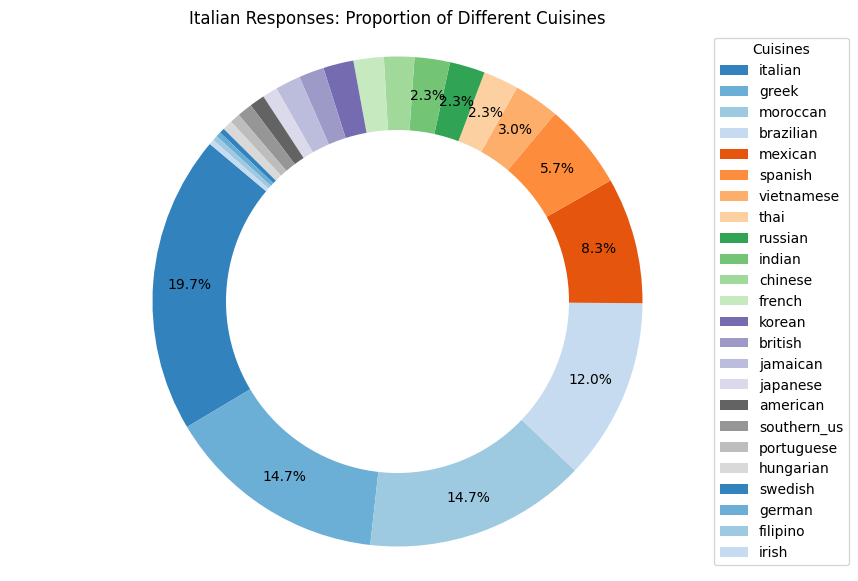

In [106]:
draw_pie_chart(italian_df, 'Italian')

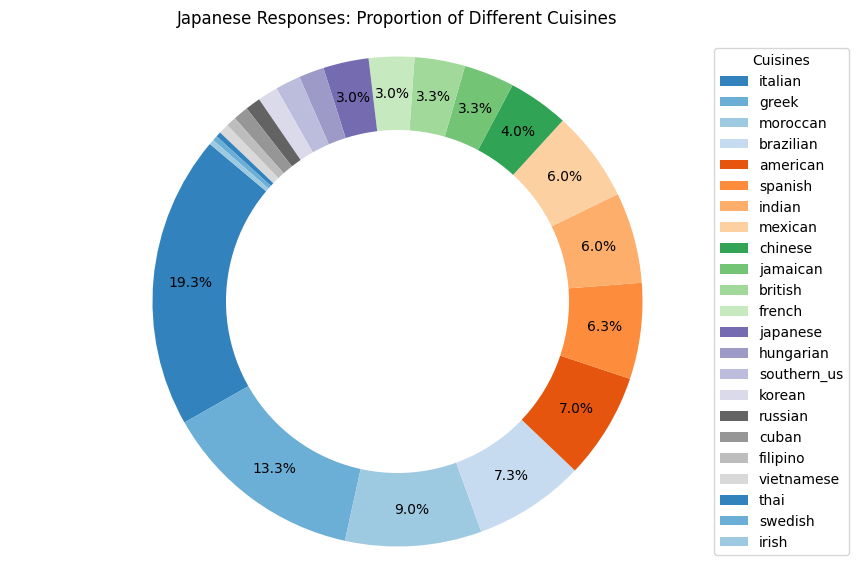

In [107]:
draw_pie_chart(jap_df, 'Japanese')

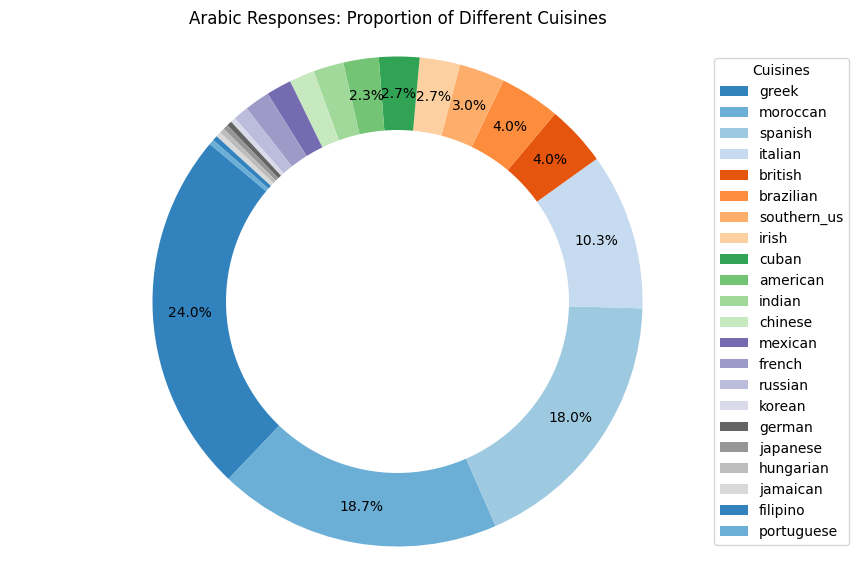

In [109]:
draw_pie_chart(arab_df, 'Arabic')

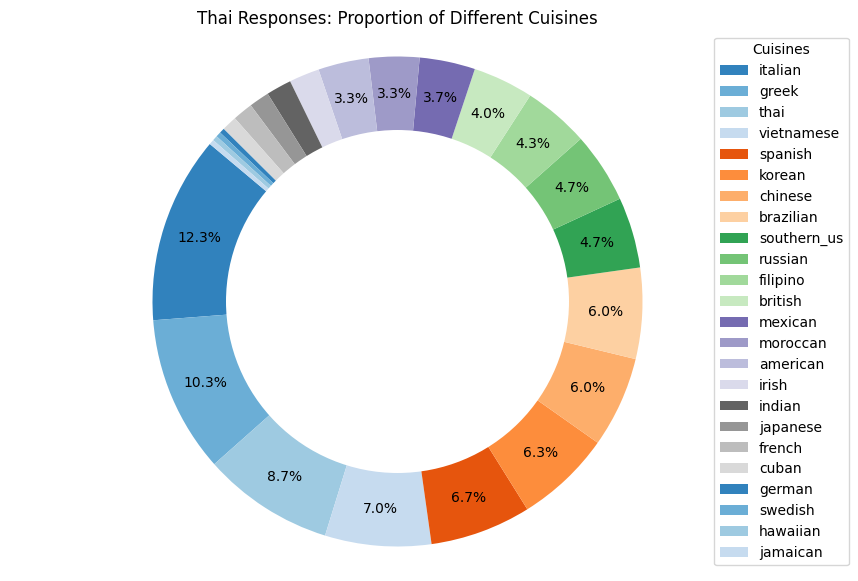

In [110]:
draw_pie_chart(thai_df, 'Thai')

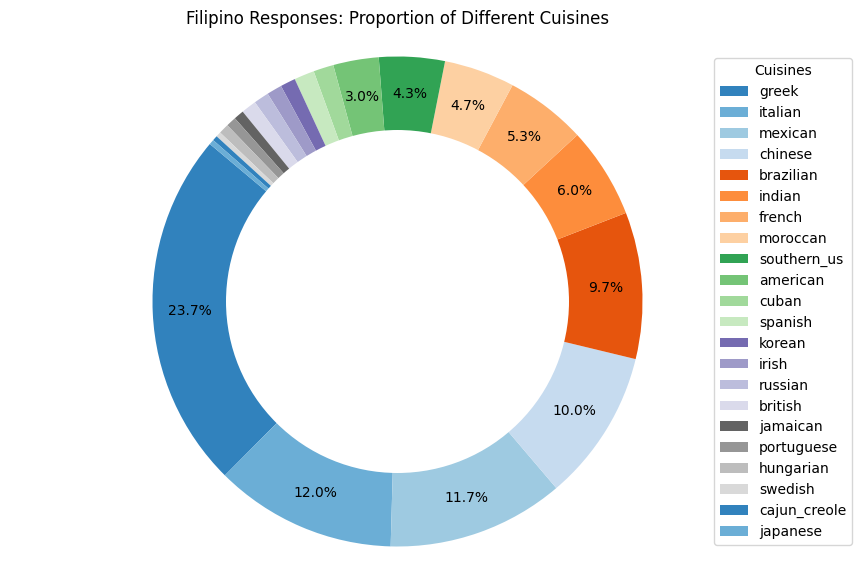

In [111]:
draw_pie_chart(fili_df, 'Filipino')

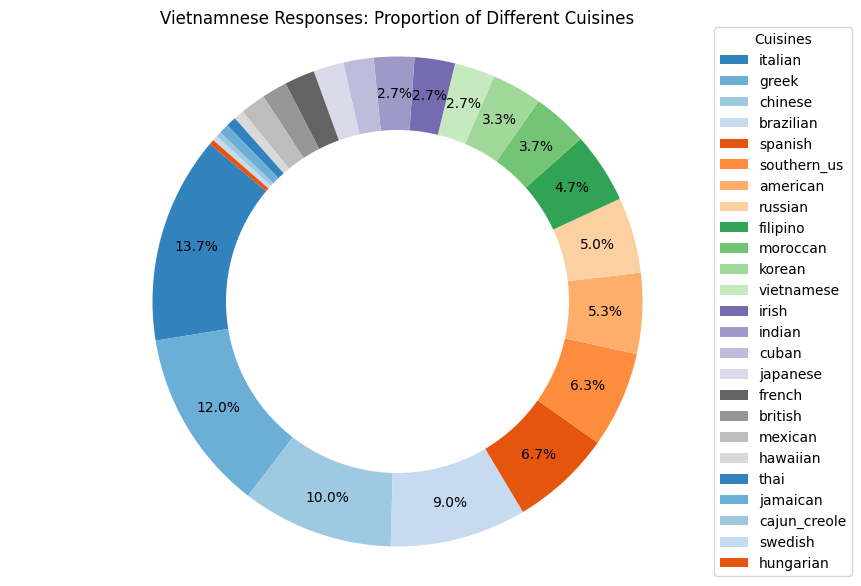

In [112]:
draw_pie_chart(viet_df, 'Vietnamnese')

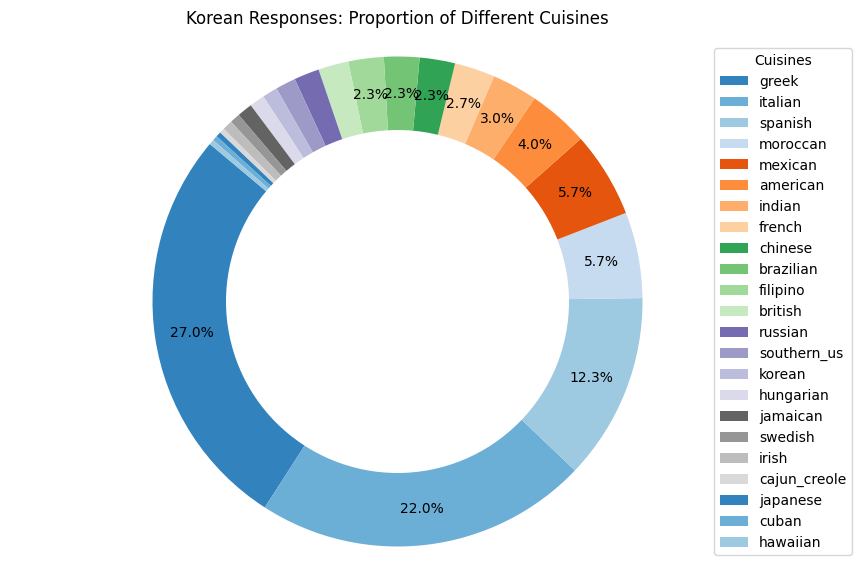

In [113]:
draw_pie_chart(kor_df, 'Korean')

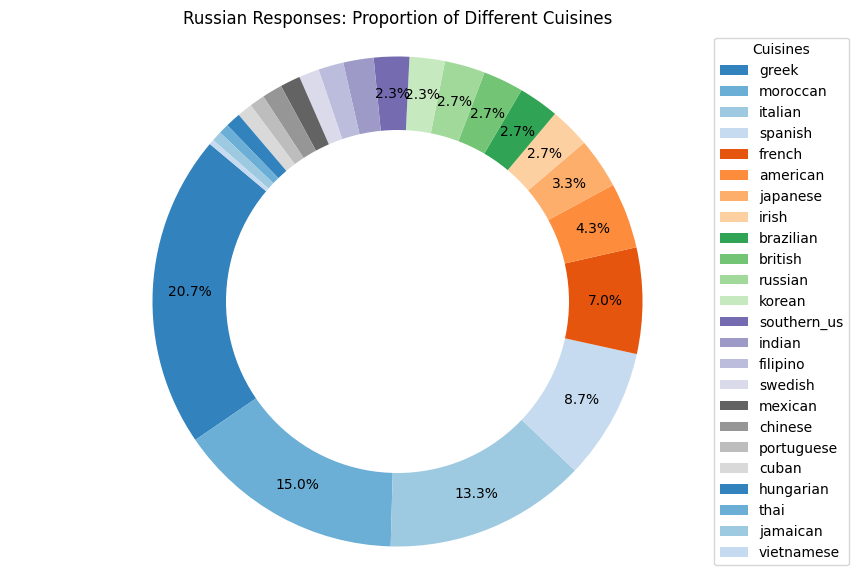

In [114]:
draw_pie_chart(russian_df, 'Russian')